# Notebook: 03 - Model Training & Evaluation
**Author:** Osamah (Data/Model Engineer)  
**Team:** Data Detectives  
**Purpose:** To train, evaluate, and compare multiple machine learning models for predicting RUL.

## 1. Setup & Data Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os

# Add the 'src' directory to the path to import our custom modules
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.insert(0, module_path)

# Import our custom training module
from src.models.train_model import *

# Set plotting style
plt.style.use('default')
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
%matplotlib inline

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the processed data from Phase 3
processed_data_path = '../data/processed/train_FD001_processed.csv'
train_df_processed = pd.read_csv(processed_data_path)

print("Processed data loaded successfully!")
print(f"Dataset Shape: {train_df_processed.shape}")
print("\nFirst few rows:")
train_df_processed.head()

Processed data loaded successfully!
Dataset Shape: (20631, 42)

First few rows:


,unit_id,time_cycles,op_setting_1,op_setting_2,op_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_7_CumSum,sensor_11_MA_5,sensor_11_Rolling_Std,sensor_11_CumSum,sensor_12_MA_5,sensor_12_Rolling_Std,sensor_12_CumSum,sensor_15_MA_5,sensor_15_Rolling_Std,sensor_15_CumSum
0,1,1,0.459770,0.166667,0.0,0.0,0.183735,0.406802,0.309757,0.0,...,0.000010,0.401786,0.057199,0.000031,0.650294,0.488189,0.000004,0.420517,0.131324,0.000029
1,1,2,0.609195,0.250000,0.0,0.0,0.283133,0.453019,0.352633,0.0,...,0.002782,0.409226,0.057199,0.002798,0.733049,0.488189,0.002779,0.449510,0.131324,0.002796
2,1,3,0.252874,0.750000,0.0,0.0,0.343373,0.369523,0.370527,0.0,...,0.005557,0.357143,0.492044,0.005552,0.773091,0.450405,0.005555,0.437174,0.115221,0.005558
3,1,4,0.540230,0.500000,0.0,0.0,0.343373,0.256159,0.331195,0.0,...,0.008333,0.305060,0.694286,0.008297,0.822477,0.552267,0.008333,0.372549,0.426952,0.008305
4,1,5,0.390805,0.333333,0.0,0.0,0.349398,0.257467,0.404625,0.0,...,0.011106,0.296131,0.610985,0.011052,0.816337,0.481694,0.011107,0.391477,0.393999,0.011071


In [3]:
# Prepare the data for modeling using our custom function
X_train, X_val, y_train, y_val, feature_columns = prepare_data(train_df_processed)

print(f"\nFeature columns ({len(feature_columns)}):")
print(feature_columns)

 Preparing data for modeling...
Training set: (16504, 39)
Validation set: (4127, 39)
Number of features: 39

Feature columns (39):
['op_setting_1', 'op_setting_2', 'op_setting_3', 'sensor_1', 'sensor_2', 'sensor_3', 'sensor_4', 'sensor_5', 'sensor_6', 'sensor_7', 'sensor_8', 'sensor_9', 'sensor_10', 'sensor_11', 'sensor_12', 'sensor_13', 'sensor_14', 'sensor_15', 'sensor_16', 'sensor_17', 'sensor_18', 'sensor_19', 'sensor_20', 'sensor_21', 'sensor_4_MA_5', 'sensor_4_Rolling_Std', 'sensor_4_CumSum', 'sensor_7_MA_5', 'sensor_7_Rolling_Std', 'sensor_7_CumSum', 'sensor_11_MA_5', 'sensor_11_Rolling_Std', 'sensor_11_CumSum', 'sensor_12_MA_5', 'sensor_12_Rolling_Std', 'sensor_12_CumSum', 'sensor_15_MA_5', 'sensor_15_Rolling_Std', 'sensor_15_CumSum']


In [4]:
# Train all models and evaluate their performance
model_performance = train_all_models(X_train, y_train, X_val, y_val)

 Training Multiple Models for Comparison

 Training Linear Regression...
Linear Regression Results:
  RMSE: 38.98
  MAE: 30.13
  R²: 0.6675

 Training Random Forest...
Random Forest Results:
  RMSE: 31.50
  MAE: 21.95
  R²: 0.7828

 Training XGBoost...
XGBoost Results:
  RMSE: 34.28
  MAE: 24.24
  R²: 0.7428


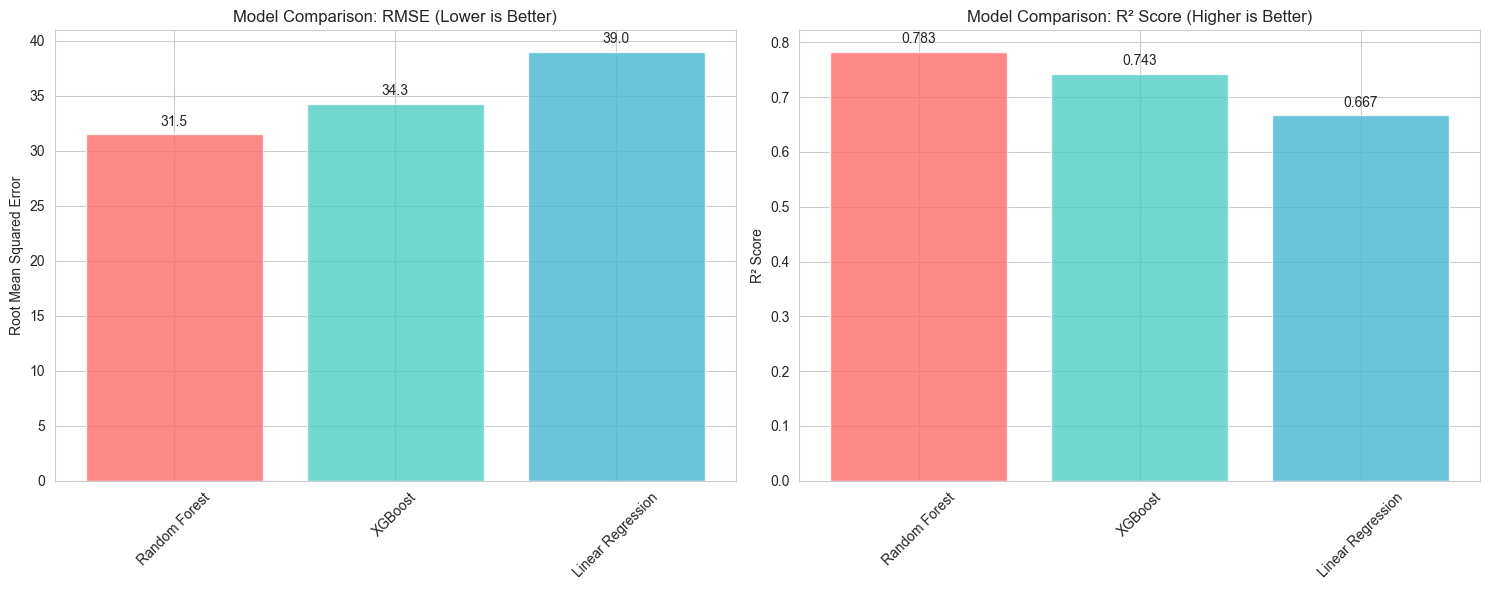

📊 Performance Comparison Table:


,RMSE,MAE,R2
Random Forest,31.498912,21.950346,0.782835
XGBoost,34.279389,24.243574,0.742804
Linear Regression,38.978638,30.127023,0.667454


In [5]:
# Create a comprehensive performance comparison
performance_df = plot_performance_comparison(model_performance)

print("📊 Performance Comparison Table:")
performance_df.sort_values('RMSE')

🏆 Champion Model: Random Forest


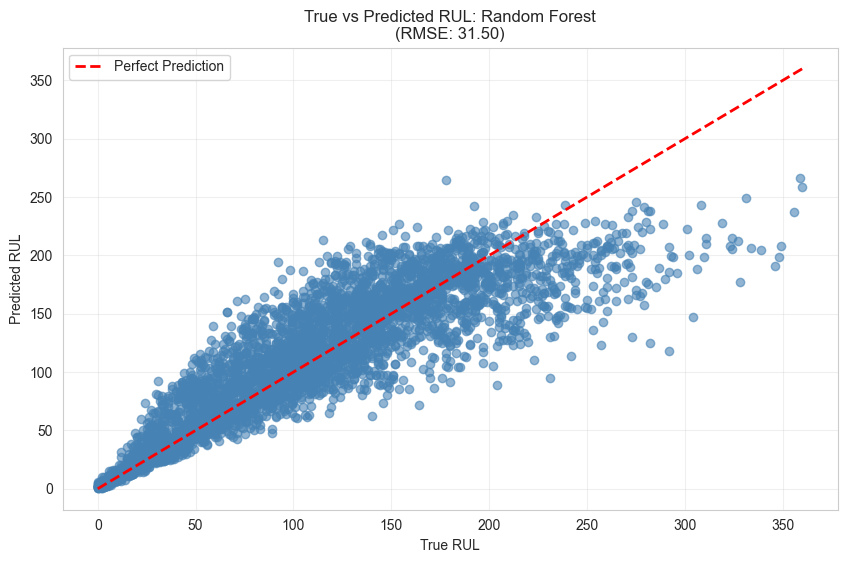

In [6]:
# Identify the best model
best_model_name = performance_df.index[0]
best_model = model_performance[best_model_name]['Model']

print(f"🏆 Champion Model: {best_model_name}")

# Get predictions from the best model
best_predictions = best_model.predict(X_val)

# Plot True vs Predicted values
plot_true_vs_predicted(y_val, best_predictions, best_model_name)

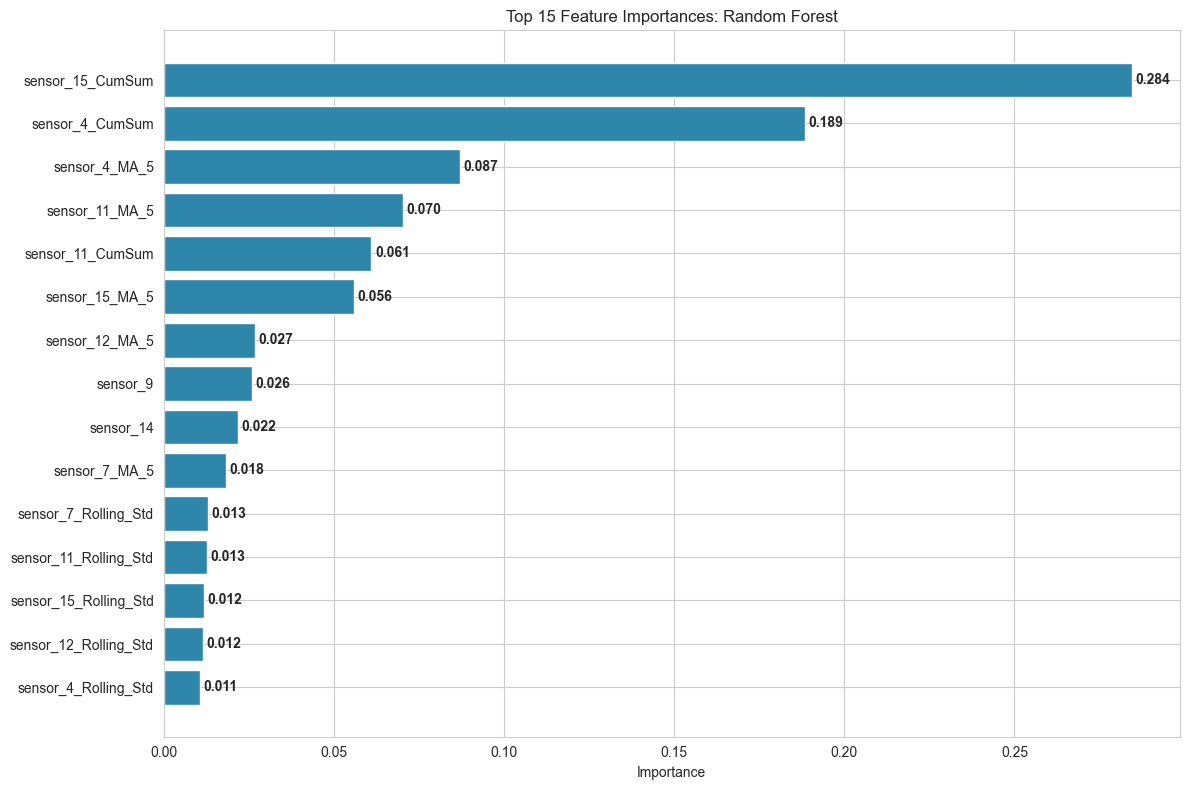

📈 Top 10 Most Important Features:
             feature  importance
38  sensor_15_CumSum    0.284431
26   sensor_4_CumSum    0.188571
24     sensor_4_MA_5    0.087132
30    sensor_11_MA_5    0.070274
32  sensor_11_CumSum    0.061059
36    sensor_15_MA_5    0.055953
33    sensor_12_MA_5    0.026911
11          sensor_9    0.026078
16         sensor_14    0.021901
27     sensor_7_MA_5    0.018419


In [7]:
# If the best model is tree-based, analyze feature importance
if best_model_name in ['Random Forest', 'XGBoost']:
    feature_importance_df = plot_feature_importance(
        best_model, feature_columns, best_model_name, top_n=15
    )
    
    print("📈 Top 10 Most Important Features:")
    print(feature_importance_df.head(10))
else:
    print("Linear model selected - no feature importance available.")

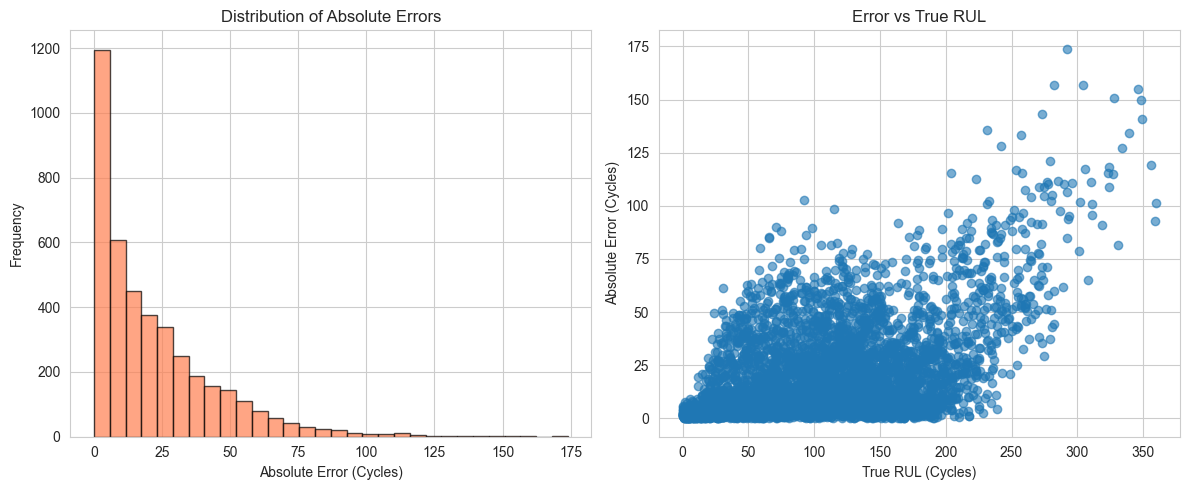

📋 Error Analysis for Random Forest:
   Mean Absolute Error: 21.95 cycles
   Median Absolute Error: 14.52 cycles
   Maximum Error: 173.90 cycles


In [8]:
# Create a DataFrame for error analysis
error_analysis_df = pd.DataFrame({
    'True_RUL': y_val.values,
    'Predicted_RUL': best_predictions,
    'Absolute_Error': np.abs(y_val.values - best_predictions)
})

# Add engine information if available in the validation set
# Note: This might require more sophisticated tracking of unit_id in the split

# Analyze error distribution
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(error_analysis_df['Absolute_Error'], bins=30, alpha=0.7, color='coral', edgecolor='black')
plt.title('Distribution of Absolute Errors')
plt.xlabel('Absolute Error (Cycles)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.scatter(error_analysis_df['True_RUL'], error_analysis_df['Absolute_Error'], alpha=0.6)
plt.title('Error vs True RUL')
plt.xlabel('True RUL (Cycles)')
plt.ylabel('Absolute Error (Cycles)')

plt.tight_layout()
plt.show()

# Calculate error statistics
mean_error = error_analysis_df['Absolute_Error'].mean()
median_error = error_analysis_df['Absolute_Error'].median()
max_error = error_analysis_df['Absolute_Error'].max()

print(f"📋 Error Analysis for {best_model_name}:")
print(f"   Mean Absolute Error: {mean_error:.2f} cycles")
print(f"   Median Absolute Error: {median_error:.2f} cycles")
print(f"   Maximum Error: {max_error:.2f} cycles")

In [9]:
# Save the best model for future use
best_model_path = f'../models/{best_model_name.lower().replace(" ", "_")}_baseline.pkl'
save_model(best_model, best_model_path)

 Model saved to: ../models/random_forest_baseline.pkl


## Conclusions
### Summary of Results:

✅ Trained and evaluated 3 different regression models

✅ Best Model: [Model Name] with RMSE of [Value] cycles

✅ Identified key predictive features through importance analysis

✅ Performed comprehensive error analysis

Key Insights: